# Lab 6 - redukcja wymiarowości danych

Znaczna liczba atrybutów charakteryzujących dane uczące moze wprowadzać skutki niepoządane w postaci zbędnego szumu, a takze ryzyka zwiększonej wariancji wynikowego modelu. Poruszając się w duzej liczbie wymiarów napotykamy równiez ryzyko tzw. klątwy wielowymiarowości, która znacznie utrudnia znalezienie optymalnego rozwiązania. Istnieje jednak szereg metod, które znacznie ułatwiają rozwiązanie tego problemu w postaci redukcji wymiarowości poprzez usunięcie nieistotnych atrybutów. Warto mieć jednak na uwadze, ze jest to proces stratnej kompresji danych, co prowadzi do utraty pewnej części informacji.

## Metody redukcji wymiarowości

### Analiza głównych składowych

Analiza głównych składowych (ang. principal component analysis, PCA) to jedna z najpopularniejszych metod redukcji wymiarowości. Jej działanie polega na rzutowaniu danych na hiperpłaszczyznę o odgórnie wyznaczonym wymiarze. Mając na uwadze fakt, ze mozna wyznaczyć dowolną liczbę hiperpłaszczyzn przylegających do części z oryginanych wymiarów, nalezy wybrać taką hiperpłaszczyznę, która zachowa największą wariancję co wpływa jednocześnie na utratę najmniejszej ilości informacji. Największa wariancja oznacza hiperpłaszczyznę pokrywającą swoją podprzestrzenią największą ilość danych (rzut) z oryginalnej wymiarowości. W ten sposób zostaje zachowana największa odległość średniokwadratowa między zbiorem oryginalnym, a rzutem na wyznaczoną hiperpłaszczyznę.

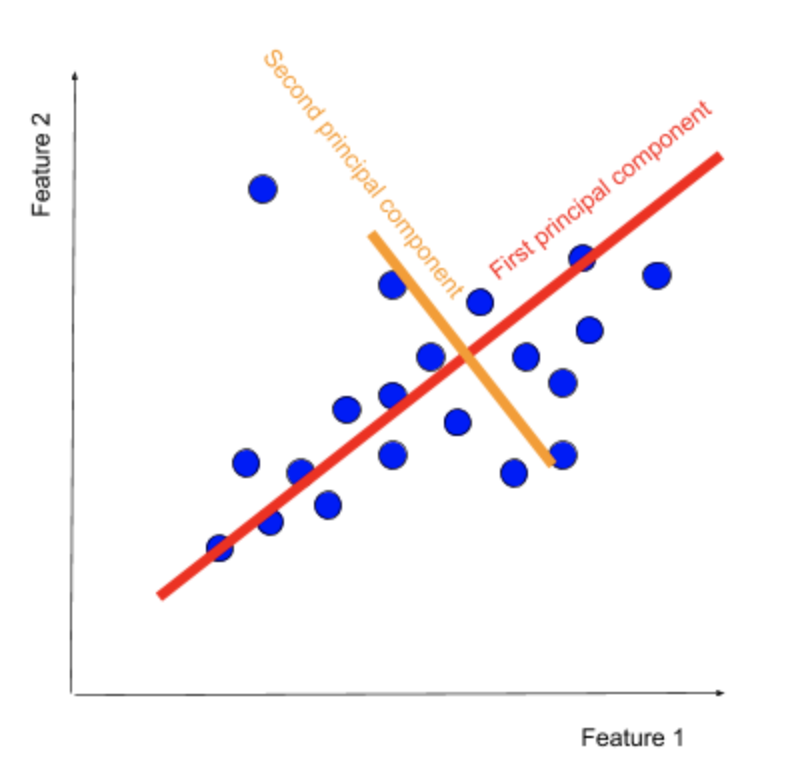

W metodzie PCA wyszukiwane są hiperpłaszczyzny ortogonalne względem siebie. W przypadku poruszania się w przestrzeni dwuwymiarowej istnieją tylko dwie mozliwości wyznaczenia takich prostych. Więcej mozliwości pojawia się w przypadku poruszania się w hiperprzestrzeni o większej liczbie wymiarów. Liczebność ta zwiększa się do nieskończonej dla nieskończeniewymiarowej hiperprzestrzeni. Warto mieć na uwadze samo pojęcie **głównej składowej** *(ang. principal component, PC)*, która oznacza kazdą kolejną hiperpłaszczyznę przylegającą do oryginalnego zbioru danych. Dla kazdej głównej składowej algorytm PCA wyznacza wychodzący ze środka wektor nadający ortogonalny kierunek kolejnej głównej składowej.

Ujmując temat wprost, algorytm PCA polega na znalezieniu *d* głównych składowych zachowujących najwyzszą wariancję, a następnie na rzutowaniu danych na *d* wymiarów, gdzie *d < m* (m - liczba oryginalnych wymiarów).

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, fetch_openml
from sklearn.decomposition import PCA

In [6]:
data = fetch_california_housing(as_frame=True)['data']

In [7]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
pca = PCA(n_components=6)

In [9]:
data_6d = pca.fit_transform(data)

In [10]:
data_6d

array([[-1.10351265e+03,  8.56663624e+00, -7.74104267e-01,
         3.55896355e+00,  2.73671858e+00, -3.74666242e+00],
       [ 9.75541244e+02, -4.67041774e+00, -1.02568060e+00,
         3.94605936e+00,  1.64756479e+00, -3.91094740e+00],
       [-9.29549908e+02,  2.00346509e+01, -1.97273701e+00,
         3.90347639e+00,  3.96784052e+00, -2.26989335e+00],
       ...,
       [-4.18437575e+02, -1.29082558e+01,  1.01901295e+00,
         3.51108761e+00, -2.58145839e+00,  1.75428879e+00],
       [-6.84439525e+02, -1.27945805e+01,  9.74409305e-01,
         3.53335100e+00, -2.42779622e+00,  1.63168668e+00],
       [-3.84362474e+01, -1.26703781e+01,  1.04286818e+00,
         3.63115237e+00, -2.19840471e+00,  1.17996360e+00]])

In [11]:
data_6d.shape

(20640, 6)

Warto zwrócić równiez uwagę na **współczynnik wariancji wyjaśnionej** *(ang. explained variance ratio)*, który dostarcza dla kazdej głównej składowej informację o odsetku zachowanej informacji wzdłuz kazdej z PC. Większe wartości sugerują, ze wskazana składowa zawiera większą ilość informacji. Mozna pokusić się takze o dalszą redukcję wymiarowości redukując pozostałe główne składowe, które zawierają mniejszą ilość informacji.

In [12]:
pca.explained_variance_ratio_

array([9.99789327e-01, 1.13281110e-04, 8.32834638e-05, 6.44304641e-06,
       5.12871119e-06, 2.31833048e-06])

#### Dobór właściwej liczby wymiarów

Jak dobrać właściwą liczbę wymiarów? W znacznej większości przypadków znacznie sprawniej jest wyznaczyć liczbę wymiarów, która zachowuje satysfakcjinujący współczynnik wariancji wyjaśnionej, niz szukać dykretnej wartości reprezentującej docelową liczbę wymiarów. Przykładowo, mozna odgórnie wskazać współczynnik wariancji wyjaśnionej na poziomie 95%, a następnie znaleźć minimalną liczbę wymiarów, która zachowa oczekiwaną wariancję. Tego rodzaju operacje mozna przeprowadzić automatycznie za pomocą klasy **PCA**, gdzie w parametrze *n_components* zostanie wskazany współczynnik wariancji wyjaśnionej, zamiast docelowej liczby wymiarów.

In [29]:
pca = PCA(n_components=0.95)
data_reduced = pca.fit_transform(data)

In [30]:
data_reduced

array([[-1103.51264821],
       [  975.54124442],
       [ -929.54990812],
       ...,
       [ -418.43757543],
       [ -684.43952537],
       [  -38.43624736]])

In [31]:
data_reduced.shape

(20640, 1)

In [32]:
pca.n_components_

1

Alternatywnie, mozna wyznaczyć współczynnik wariancji wyjaśnionej dla kazdej liczby głównych składowych, a następnie na podstawie wizualizacji wybrać tzw. łokieć reprezentujący liczbę składowych, które pokrywają największą ilość informacji.

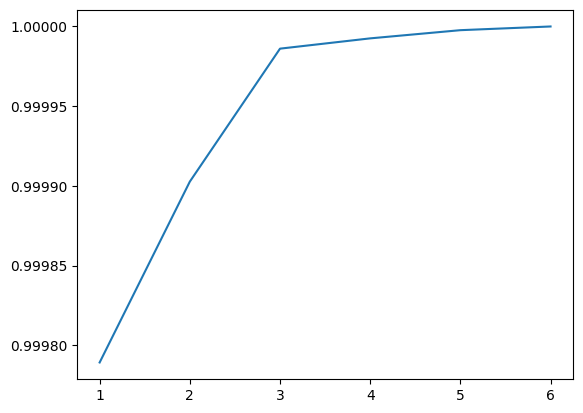

In [42]:
components = np.arange(1, data.shape[1] - 1)
variance = []

for i in components:
    pca = PCA(n_components=i)
    pca.fit_transform(data)
    variance.append(np.cumsum(pca.explained_variance_ratio_)[-1])

plt.plot(components, variance)

Warto pamiętać, ze liczbę głównych składowych mozna zawsze poddać procesowi optymalizacji hiperparametrów.

#### Odwrócenie procesu rzutowania

Istnieje równiez mozliwość odwrócenia procesu redukcji wymiarowości do oryginalnej hiperprzestrzeni za pomocą odwrotnej transformacji PCA. Proces ten nie jest jednak w stanie odzyskać utraconej informacji w procesie rzutowania. W tym celu wystarczy wykorzystać metodę *inverse_transform*, a następnie przekazać zredukowany zbiór danych.

In [48]:
mnist = fetch_openml('mnist_784')

In [54]:
pca = PCA(n_components=0.95)
mnist_reduced = pca.fit_transform(mnist['data'])

In [55]:
mnist_reduced.shape

(70000, 154)

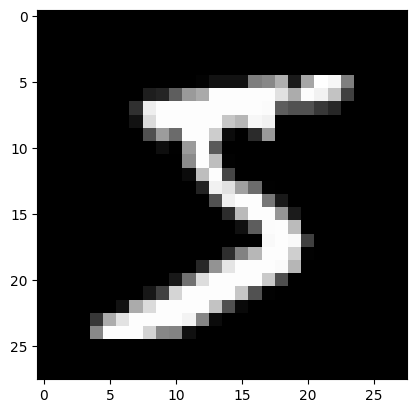

In [61]:
plt.imshow(mnist['data'].iloc[0].values.reshape(28, 28), cmap='gray')

In [62]:
mnist_inversed = pca.inverse_transform(mnist_reduced)

In [63]:
mnist_inversed.shape

(70000, 784)

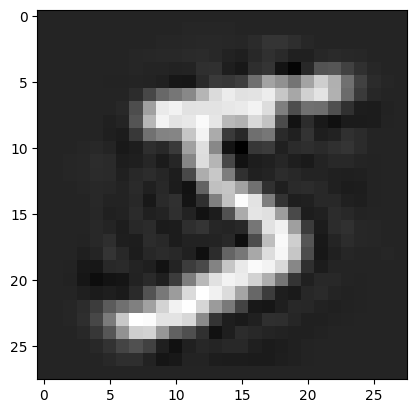

In [65]:
plt.imshow(mnist_inversed[0, ].reshape(28, 28), cmap='gray')

## Zadania

1. Przygotować funkcję, która na podstawie algorytmu PCA wyznaczy minimalną liczbę głównych składowych objaśniających przekazany w parametrze współczynnik wariancji.
2. Przygotować klasę Compressor, która przyjmie w inicjalizatorze zbiór danych w postaci ramki oraz oczekiwany współczynnik wariancji wyjaśnionej i będzie posiadała następujące metody:
   1. compress: zredukuje rozmiar danych i usunie oryginalną ramkę
   2. inverse: przywróci dane do pierwotnego rozmiaru 
   3. Przy implementacji wykorzystać metodę PCA    
3. Przygotować potok dla zbioru danych *califormia_housing*, który wyznaczy najbardziej optymalną liczbe głównych składowych dla zadania regresji przeprowadzonego za pomocą algorytmu regresji liniowej.
4. Porównać wynik uzyskany w zadaniu 3. za pomocą metody "łokcia" reprezentującego najbardziej optymalną liczbę głównych składowych.